## Analysis using the old data

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

### Data preprocessing

In [2]:
a = pd.read_csv("../data/trainingdata.csv")

In [3]:
print(a.keys())

Index(['published', 'collection', 'nauthors', 'numcit', 'influcit',
       'topic.Genomics', 'topic.Epidemiology', 'topic.Chest X-Ray',
       'topic.Healthcare', 'topic.Clinics', 'topic.Drug discovery', 'DL_Pdf',
       'DL_Full', 'DL_Abstract', 'sum.npapers', 'sum.infCit', 'mean.npapers',
       'mean.infCit', 'max.npapers', 'max.infCit'],
      dtype='object')


In [6]:
print(a.published.shape)

(348,)


In [13]:
X, y = a[['collection', 'nauthors', 'numcit', 'influcit',
       'topic.Genomics', 'topic.Epidemiology', 'topic.Chest X-Ray',
       'topic.Healthcare', 'topic.Clinics', 'topic.Drug discovery', 'DL_Pdf',
       'DL_Full', 'DL_Abstract', 'sum.npapers', 'sum.infCit', 'mean.npapers',
       'mean.infCit', 'max.npapers', 'max.infCit']],a.published

In [16]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Machine learning using xgb reg:linear model

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [47]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

[16:24:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [48]:
preds = xg_reg.predict(X_test)

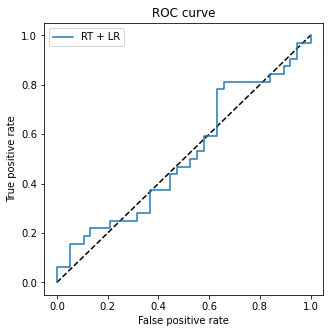

AUC is :0.5115131578947368


<Figure size 360x360 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, preds)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('old_data_roc.png', dpi=100)

print("AUC is :" + str(auc(fpr_rt_lm, tpr_rt_lm)))

<Figure size 360x360 with 0 Axes>

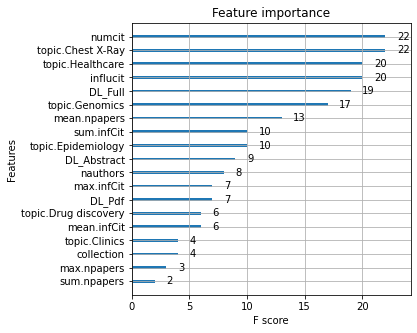

<Figure size 360x360 with 0 Axes>

In [58]:
plt.figure()
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('old_data_feature_importance.png', dpi=100)